<a href="https://colab.research.google.com/github/SaranyaRavikumar06/Prediction-of-Hotel-booking-/blob/main/Hotelbooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hotel Booking Demand Analysis & Cancelation prediction**
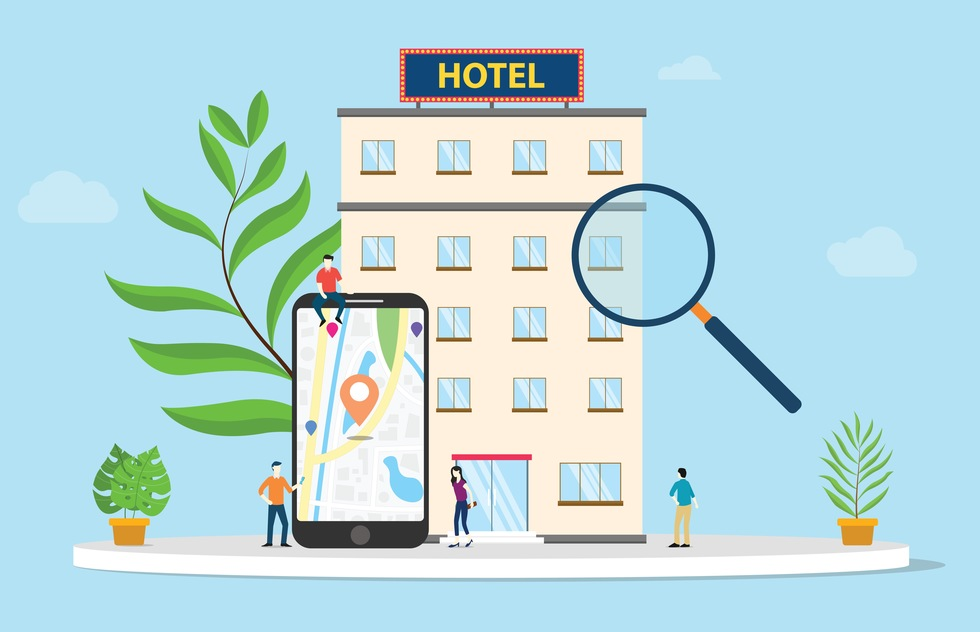

**About Dataset:**
This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. 

# **Import necessary libraries**

In [502]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

import folium
from folium.plugins import HeatMap
import plotly.express as px
import seaborn as sns

## Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
#Calculate by using PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score



# **Reading the data**

In [503]:
#The data is read from the git(Datasets) repository
data=pd.read_csv('https://raw.githubusercontent.com/SaranyaRavikumar06/Prediction-of-Hotel-booking-/main/hotel_bookings.csv')

In [418]:
#Dataset is copied in another variable name, to maintain the original raw data undisturbed 
dcopy=data.copy()

# **Q1. Provide various descriptive analytics and insights**

**Step 1:Data Exploration**

In [419]:
#Displays the input datasets
dcopy

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [420]:
#View the number of rows and columns
dcopy.shape

(119390, 32)

There are 119390 observations and 32 features in the dataset

In [421]:
#View the features
dcopy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

The 32 features are
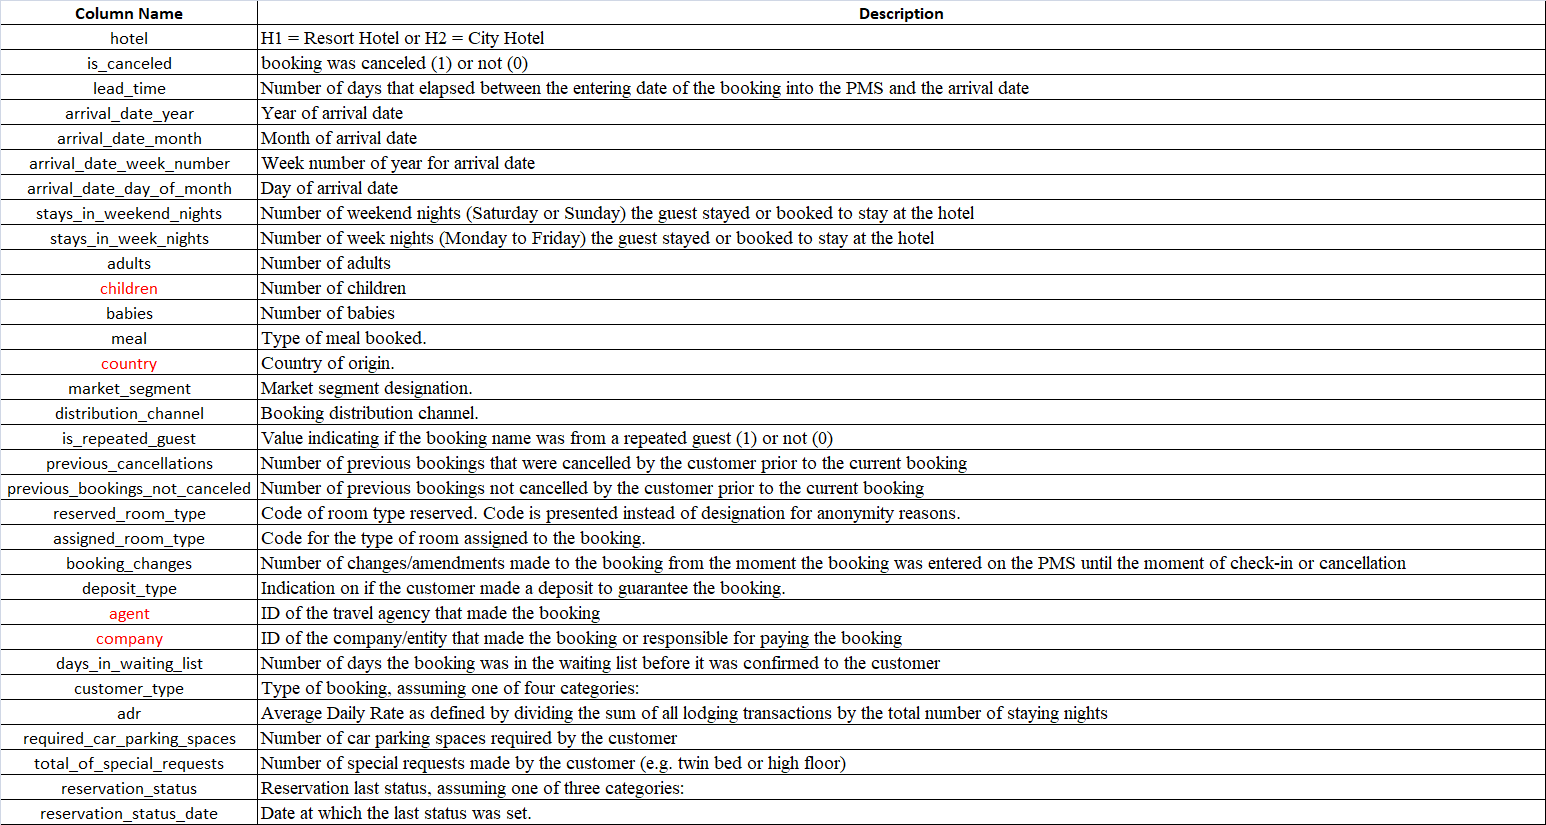

In [422]:
#Display the first 5 rows in our dataset
dcopy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [423]:
#Display the datatypes of each feature in the dataset
dcopy.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month              object
                                ...   
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status              object
reservation_status_date         object
Length: 32, dtype: object

**Note:**
From the above report we can see that the datatype for features like children,agent and company is float64, and since the values in this columns are integere the datattype should be modified during data transformation process.

In [424]:
#Display the Categorical columns in the dataset
dcopy_catagorical=dcopy.select_dtypes(include=['object']).columns.tolist()
dcopy_catagorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [425]:
#Describe the statistical report for numerical columns in our dataset
dcopy.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Note:** 
From the above table we can find there is some outliers in the column adr(average daily rate- which is used to measure the average revenue that a hotel receives for each occupied guest room per day)which cannot be negative value.

 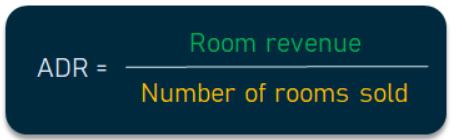



**Step 2: Data Cleansing**

In [426]:
#Check for Null or missing values in the datset
dcopy.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
                              ..
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
reservation_status_date        0
Length: 32, dtype: int64

We can find that there are 4 columns having the missing or null values

In [427]:
#Extract the coumns having null or missing values
nulldata_columns=dcopy.columns[dcopy.isnull().any()].tolist() 
nulldata_columns

['children', 'country', 'agent', 'company']

In [428]:
#Create a function to display the analysis report for missing values
def missing_values_table(df):
        mis_val = df.isnull().sum() #Find the sum of missing values in the column
        modif_table = pd.concat([mis_val], axis=1) #create a table 
        modif_table =modif_table.rename(columns = {0 : 'Total Missing Values for the column'})
        modif_table['Data Type'] = df.dtypes #Display the datatype of the column
        modif_table['Total % of Missing Values for the column']=100 * df.isnull().sum() / len(df) #Calculate in percentage
        modif_table = modif_table[modif_table.iloc[:,0] != 0].sort_values('Total % of Missing Values for the column', ascending=False).round(3) #add the values to the table by rounding the percentage value to three decimal plzce
        
        return modif_table

missing_values_table(dcopy)

,Total Missing Values for the column,Data Type,Total % of Missing Values for the column
company,112593,float64,94.307
agent,16340,float64,13.686
country,488,object,0.409
children,4,float64,0.003


**Note:**
Here we have considered only the missing values but in children column we also have values that are 'zero' which is meaningful data since the count of children can be '0'.

**Data Imputation - Replacing the missing values**

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [429]:
dcopy[['agent','company']] = dcopy[['agent','company']].fillna(0.0)

In [430]:
missing_values_table(dcopy)

,Total Missing Values for the column,Data Type,Total % of Missing Values for the column
country,488,object,0.409
children,4,float64,0.003


Children column contains the count of children, so we will replace all the missing values with the rounded mean value.

In [431]:
dcopy['children'].fillna(round(data.children.mean()), inplace=True)

In [432]:
missing_values_table(dcopy)

,Total Missing Values for the column,Data Type,Total % of Missing Values for the column
country,488,object,0.409


Since the country column contains country codes representing different countries which is a categorical feature so we will also replace it with the mode value.So,here we will be replacing it with the country that appears the most often.



In [433]:
dcopy['country'].fillna(data.country.mode().to_string(), inplace=True)

In [434]:
missing_values_table(dcopy)

,Total Missing Values for the column,Data Type,Total % of Missing Values for the column


There are many rows that have zero guests including adults, children and babies which is a meaningless data and hence it can be removed.

In [435]:
dcopy[(dcopy.adults+dcopy.babies+dcopy.children)==0].shape

(180, 32)

 we will just remove this 180 rows

In [436]:
dcopy_new=dcopy.drop(dcopy[(dcopy.adults+dcopy.babies+dcopy.children)==0].index)

Remove the row having the average daily revenue less than 0

In [437]:
dcopy_new=dcopy_new[dcopy_new['adr']>=0]

In [438]:
dcopy_new.shape

(119209, 32)

In [439]:
dcopy.shape

(119390, 32)

Now we have finally imputed all the missing and unwanted values in our data

# **Data Transformation**

In [440]:
dcopy_new.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month              object
                                ...   
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status              object
reservation_status_date         object
Length: 32, dtype: object

In [441]:
## convert datatype of these columns from float to integer
dcopy_new[['children', 'company', 'agent']] = dcopy[['children', 'company', 'agent']].astype('int64')

In [442]:
dcopy_new.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month              object
                                ...   
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status              object
reservation_status_date         object
Length: 32, dtype: object

In [443]:
dcopy_new.shape

(119209, 32)

In [444]:
#Find for duplicate values in the dataset
dcopy_new.duplicated().any()

True

In [445]:
dcopy_new.duplicated().value_counts()

False    87229
True     31980
dtype: int64

We can find that we have 31980(27%) duplicate rows and 87229(73%) non-duplicate rows in the dataset 

In [446]:
#create a dataframe by removing the duplicate rows in the dataset
dcopy_new1=dcopy_new.drop_duplicates(inplace=False)

**Cleansed Data**

In [447]:
#Shape of the clean data
dcopy_new1.shape

(87229, 32)

In [448]:
#Type of data 
dcopy_new1.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month              object
                                ...   
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status              object
reservation_status_date         object
Length: 32, dtype: object

**Booked /Cancelled Data**

In [449]:
#create a table having only the hotel booked data
bookedhotel_data=dcopy_new1[dcopy_new1['is_canceled']==0]
cancelled_data=dcopy_new1[dcopy_new1['is_canceled']==1]

In [450]:
bookedhotel_data.shape

(63220, 32)

In [451]:
cancelled_data.shape

(24009, 32)

# **Q2. Suggest the use cases suitable here from the perspective of the hotel owner?**

# **1. What is the percentage of booking and cancellation for two types of Hotel?**

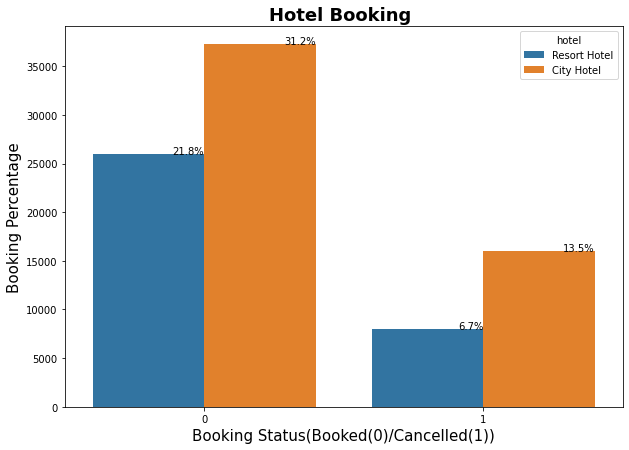

In [452]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x ='is_canceled',hue='hotel',data = dcopy_new1)
ax.set_title('Hotel Booking ',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Booking Status(Booked(0)/Cancelled(1))', fontsize = 15)
ax.set_ylabel('Booking Percentage', fontsize = 15)
total = float(len(dcopy_new))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')



1.   We can find the **City hotel is booked more** when compared to the Resort hotel
2.   We can find the City hotel is cancelled more when compared to the Resort hotel



# **2. What is the Hotel booking Year Wise?**

<Figure size 1080x432 with 0 Axes>

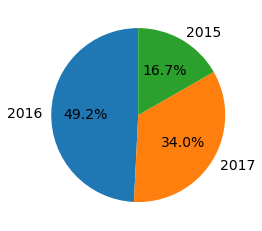

<Figure size 1080x432 with 0 Axes>

In [453]:

labels1 = bookedhotel_data['arrival_date_year'].value_counts().index.tolist()
sizes1 =  bookedhotel_data['arrival_date_year'].value_counts().tolist()
plt.pie(sizes1,labels=labels1,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.figure(figsize=(15,6))

Hotel booking was **high during the year 2016**

# **3. What is the Hotel cancellation Year Wise?**

<Figure size 1080x432 with 0 Axes>

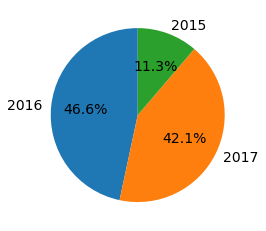

<Figure size 1080x432 with 0 Axes>

In [454]:

labels1 = cancelled_data['arrival_date_year'].value_counts().index.tolist()
sizes1 =  cancelled_data['arrival_date_year'].value_counts().tolist()
plt.pie(sizes1,labels=labels1,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.figure(figsize=(15,6))

From the above two graphs,We can find that the percentage of **hotel booking and cancelled is equal during 2016, and during 2017 and 2015 the hotel cancelled is more than the hotel booked**

# **4. What is the Hotel booking Month Wise?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Booking Count')

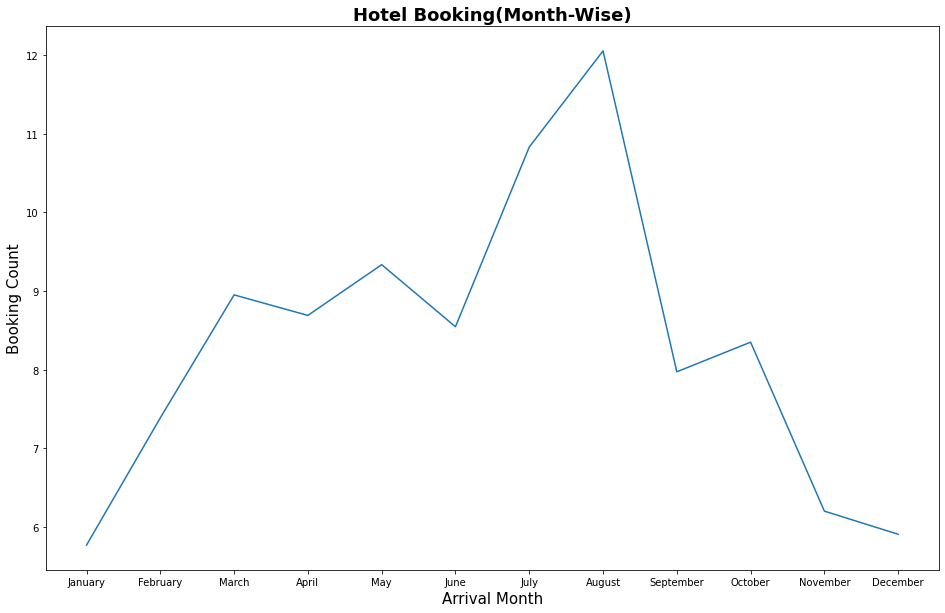

In [455]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = bookedhotel_data['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

ax1 = plt.subplots(figsize = (16,10))
ax1=sns.lineplot(x, y.values)
ax1.set_title('Hotel Booking(Month-Wise)',fontsize = 18, fontweight='bold' )
ax1.set_xlabel('Arrival Month', fontsize = 15)
ax1.set_ylabel('Booking Count', fontsize = 15)

**As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.**

# **5.Which are the top 10 country peoples booked the hotel mostly?**

In [456]:
s = pd.value_counts(bookedhotel_data['country'])
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)
s2=s.sort_values(axis=0,ascending=False)
s3=s2.nlargest(10)
s3

PRT    17573
GBR     8439
FRA     7091
ESP     5382
DEU     4332
IRL     2347
ITA     1986
BEL     1670
NLD     1560
USA     1412
Name: country, dtype: int64

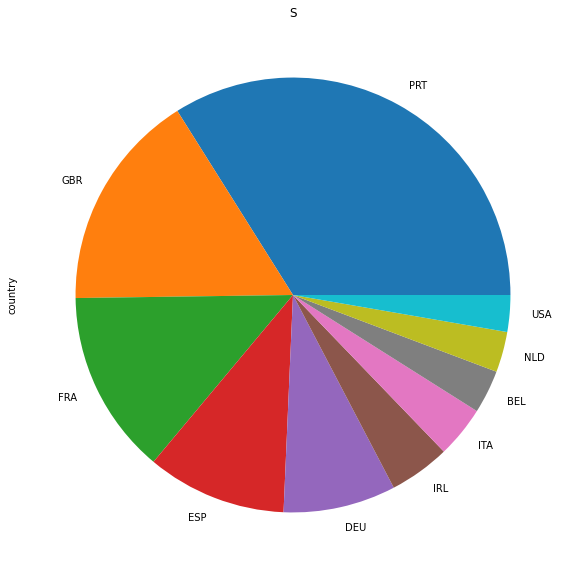

In [457]:
s3.plot(kind='pie',title='S',figsize=(16,10))

**Guest country distribution**

In [458]:
guest_city =bookedhotel_data['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

,Country,No of guests
0,PRT,17573
1,GBR,8439
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


In [459]:

basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'],title="Home country of guests", hover_name = guest_city['Country'],color_continuous_scale=px.colors.sequential.Plasma)
guests_map.show()

# **6. How Long People Stay in the hotel?**

In [460]:
total_nights = bookedhotel_data['stays_in_weekend_nights']+ bookedhotel_data['stays_in_week_nights']
ct=pd.value_counts(total_nights)
s3=ct.sort_values(axis=0,ascending=False)
s3

1     14008
3     12483
2     11531
4      9425
7      5211
      ...  
46        1
56        1
45        1
60        1
34        1
Length: 39, dtype: int64

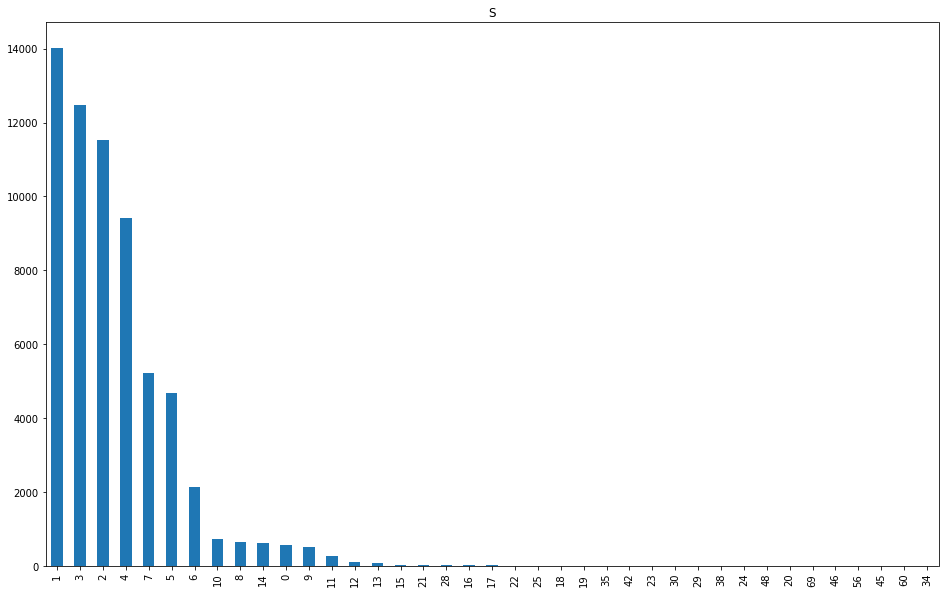

In [461]:
s3.plot(kind='bar',title='S',figsize=(16,10))

There are more peoples who book for **only one day in the hotel.**

# **7.	Which was the most booked accommodation type (Single, Couple, Family)?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Booking (%)')

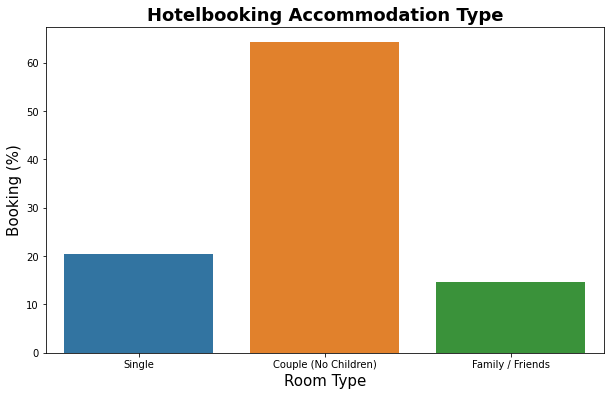

In [462]:
## Select single, couple, multiple adults and family
single_room   = bookedhotel_data[(bookedhotel_data.adults==1) & (bookedhotel_data.children==0) & (bookedhotel_data.babies==0)]
couple_room   = bookedhotel_data[(bookedhotel_data.adults==2) & (bookedhotel_data.children==0) & (bookedhotel_data.babies==0)]
family_room   = bookedhotel_data[bookedhotel_data.adults + bookedhotel_data.children + bookedhotel_data.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single_room.shape[0],couple_room.shape[0], family_room.shape[0]]
count_percent = [x/bookedhotel_data.shape[0]*100 for x in count]

ax3= plt.subplots(figsize = (10,6))
ax3=sns.barplot(names,count_percent,)
ax3.set_title('Hotelbooking Accommodation Type',fontsize = 18, fontweight='bold' )
ax3.set_xlabel('Room Type', fontsize = 15)
ax3.set_ylabel('Booking (%)', fontsize = 15)

**There are more couple rooms booked in the hotel.The family people book the hotel rarely so we can suggest the hotel owner to provide some additional features in the hotel to attract more family customers**

# **8.	Find how many people visited the hotel only once and get feedback from them?**

Text(0, 0.5, 'Non-Booking count')

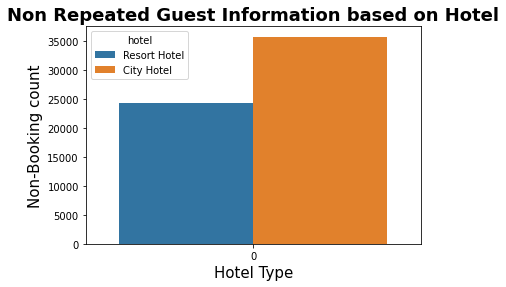

In [463]:
newdata= bookedhotel_data[bookedhotel_data['is_repeated_guest']==0]
ax4=sns.countplot(x ='is_repeated_guest',hue='hotel', data = newdata)
ax4.set_title('Non Repeated Guest Information based on Hotel',fontsize = 18, fontweight='bold' )
ax4.set_xlabel('Hotel Type', fontsize = 15)
ax4.set_ylabel('Non-Booking count', fontsize = 15)


**There are more city hotel customers who do not repeat booking, so the hotel management can identify them to collect feedback and improve the booking rate**

# **9. Find the Customer type of booking booked for each type of hotel?**

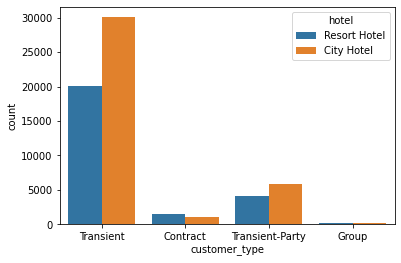

In [464]:
sns.countplot(x='customer_type',hue='hotel',data=bookedhotel_data)


**There are more bookings only from the transient customer type when compared to other types**

# **9.	Find how many reserved room type has changed to assigned room type?**

In [465]:
newdat1=bookedhotel_data[bookedhotel_data['reserved_room_type']!=bookedhotel_data['assigned_room_type']]
newdat1['reserved_room_type']

2         A
12        D
15        D
17        A
18        A
         ..
119273    A
119274    A
119289    E
119297    D
119357    A
Name: reserved_room_type, Length: 12373, dtype: object

In [466]:
newdat1['assigned_room_type']

2         C
12        E
15        E
17        E
18        G
         ..
119273    K
119274    K
119289    F
119297    F
119357    D
Name: assigned_room_type, Length: 12373, dtype: object

We can find that the reserved booking room type 'A' is mostly changed during check-in may be due to various reasons like over stay by the people since they are happy with the room 'A'.

This problem can be reduced since it leads to customer dissatisfaction ,hence the management can try to improve the other room facitlities so that th customer can have options to choose.

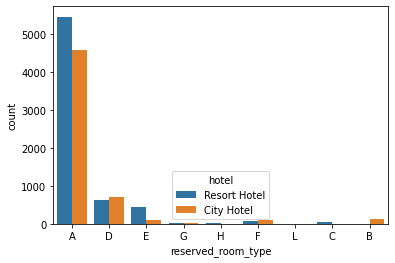

In [467]:
sns.countplot(x ='reserved_room_type',hue='hotel', data = newdat1)

# **Q3. Suggest the use cases suitable here from the perspective of the guests?**

# **1. Find which type of hotel people visited repeatedly?**

Text(0, 0.5, 'Booking count')

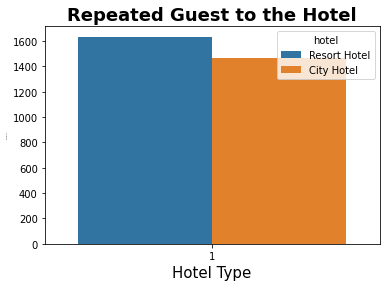

In [468]:
newdata= bookedhotel_data[bookedhotel_data['is_repeated_guest']==1]
ax4=sns.countplot(x ='is_repeated_guest',hue='hotel', data = newdata)
ax4.set_title('Repeated Guest to the Hotel',fontsize = 18, fontweight='bold' )
ax4.set_xlabel('Hotel Type', fontsize = 15)
ax4.set_ylabel('Booking count', fontsize = 1)

We can find that there are more repeated guest to the resort hotel.

***Recommendation:***

**For Hotel Owners:**
Management can provide some remainders or notifications on the month which they book frequently

**For Guest:**
People can choose resort hotel when compared to city hotel


# **2. Find the type of room reserved often in both type of hotel?**

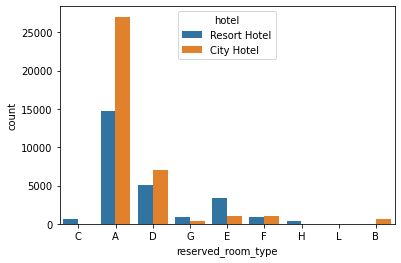

In [469]:
sns.countplot(x ='reserved_room_type',hue='hotel', data =bookedhotel_data)

We can find the room 'A' is reserved mostly by the people both in resort and city hotel.

**Recommedation:** 

**For Hotel Owners:**
Management can identify the reason behind the room which are not frequently reserved and improve the quality of such room

**For Guest:**
Can book the room 'A' since it is the most repeated booked room.

#**3.Which month peoples book the hotel in advance for the seasoned months?**

Lead Time is the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.

In [470]:
totallead = bookedhotel_data.groupby(['arrival_date_month','hotel'])['lead_time'].sum().reset_index(name='TotalLead')
totallead

,arrival_date_month,hotel,TotalLead
0,April,City Hotel,232388
1,April,Resort Hotel,136942
2,August,City Hotel,401533
3,August,Resort Hotel,289598
4,December,City Hotel,96156
...,...,...,...
19,November,Resort Hotel,50409
20,October,City Hotel,197639
21,October,Resort Hotel,195252
22,September,City Hotel,191748


Text(0, 0.5, 'Total Lead')

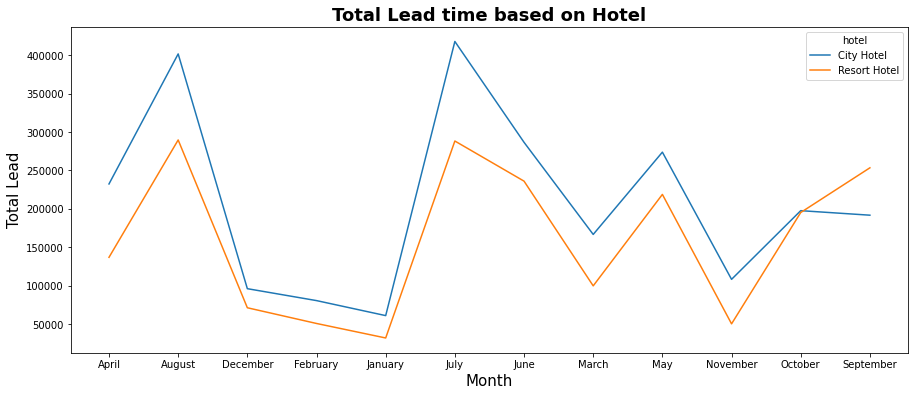

In [471]:
ax5= plt.subplots(figsize = (15,6))
ax5=sns.lineplot(x='arrival_date_month', y ='TotalLead',hue='hotel',data=totallead)
ax5.set_title('Total Lead time based on Hotel',fontsize = 18, fontweight='bold' )
ax5.set_xlabel('Month', fontsize = 15)
ax5.set_ylabel('Total Lead', fontsize = 15)

Since,July-August is seasoned months ,people book earlier for these months in earlier.

# **4. Which type of Hotel Booked?**

([<matplotlib.patches.Wedge at 0x7feb635d5f10>,
 [Text(-1.0572454748451956, -0.30369722738174143, 'City Hotel'),
  Text(1.0572455032793775, 0.30369712839527474, 'Resort Hotel')],
 [Text(-0.5766793499155611, -0.16565303311731347, '58.9%'),
  Text(0.5766793654251149, 0.16565297912469532, '41.1%')])

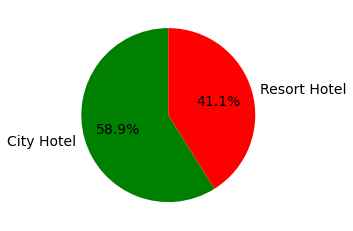

In [472]:
labels = bookedhotel_data['hotel'].value_counts().index.tolist()
sizes = bookedhotel_data['hotel'].value_counts().tolist()
colors = ["green","red"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})


It recommends the customer to book city hotel.

# **4.Which type of market segment does the people used to book the hotel mostly?**

In [473]:
s = pd.value_counts(bookedhotel_data['market_segment'])
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)
s2=s.sort_values(axis=0,ascending=False)
s3=s2.nlargest(10)
s3

Online TA        33311
Offline TA/TO    11798
Direct           10043
Corporate         3691
Groups            3589
Complementary      607
Aviation           181
Name: market_segment, dtype: int64

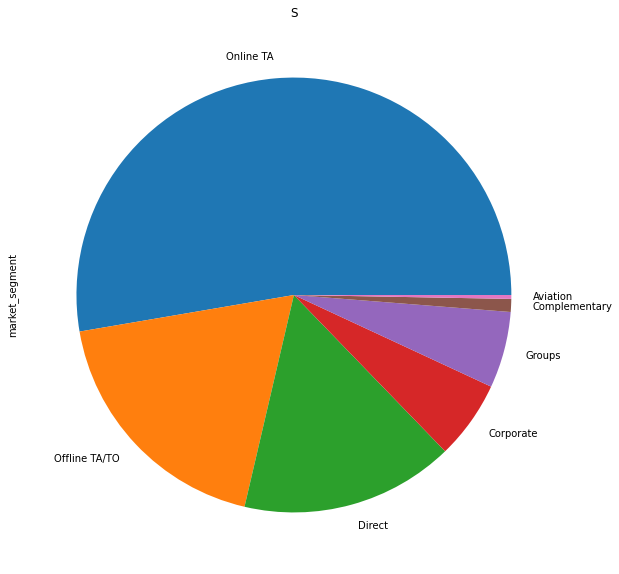

In [474]:
s3.plot(kind='pie',title='S',figsize=(16,10))

Most customer booked using online Tour Agent rather than other mode.Nowasays,people rarely use complementary market segment for hotel booking

# **5.Which type of meal is more preferred by the customer?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



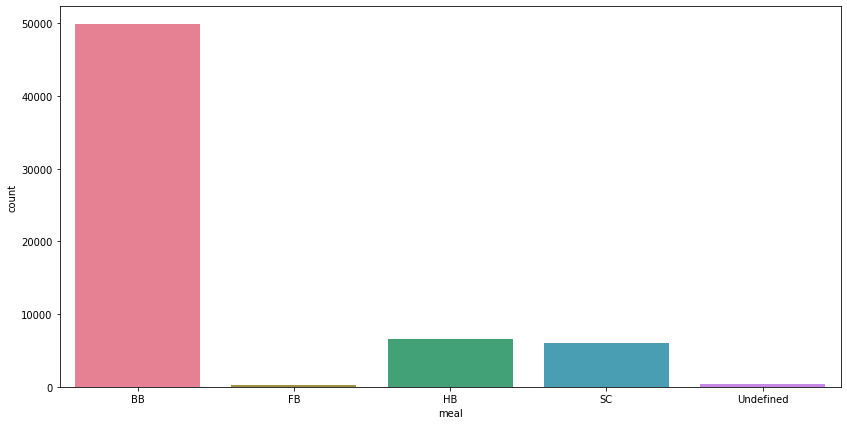

In [475]:
plt.figure(figsize=(14,7))
sns.countplot(bookedhotel_data['meal'], palette='husl')
plt.show()

Most customers booked for bed and breakfast followed by half board and No meal package

# **6.Find which month have the highest price?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



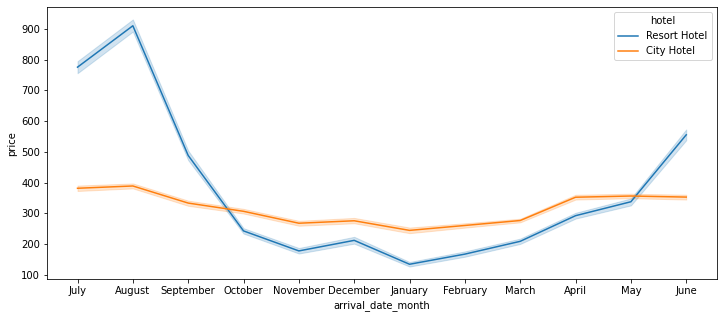

In [476]:
plt.figure(figsize=(12,5))
# Calculating average daily rate per person
bookedhotel_data['adrrp'] = bookedhotel_data['adr'] / (bookedhotel_data['adults'] + bookedhotel_data['children']) 
bookedhotel_data['price'] = bookedhotel_data['adr'] * (bookedhotel_data['stays_in_weekend_nights'] + bookedhotel_data['stays_in_week_nights'])
sns.lineplot(data = bookedhotel_data, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.show()

Mostly we can see that price are high during seasoned months from june to august

In [477]:
#Drop the created columns
bookedhotel_data=bookedhotel_data.drop(['adrrp', 'price'], axis = 1)

# **7.How many bookings changes have been done during the studied period?**

In [478]:
bookedhotel_data.booking_changes.sum()

19554

# **8.How many car parking spaces have been used?**

In [479]:
bookedhotel_data['required_car_parking_spaces'].value_counts()


0    55914
1     7273
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



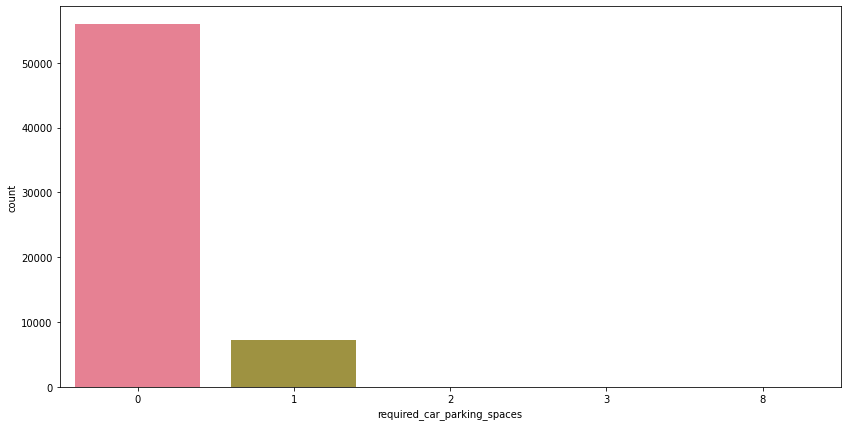

In [480]:
plt.figure(figsize=(14,7))
sns.countplot(bookedhotel_data['required_car_parking_spaces'], palette='husl')
plt.show()

Most customers do not require parking spaces .Less than 2% requires parking spaces

#**Inferences and Conclusion**
1.	City hotel is booked more than Resort hotel
2.	Most booking are not cancelled, however cancelled booking are quite a lot too.
3.	People tend to stay mostly for 2 days during weekdays for City Hotel, while for Resort Hotel, people mostly stay for 1 until 3 days.
4.	The majority of guests come from western Europe countries.
5.	The majority of reservations are for city hotels.
6.	Most of the bookings are by non-repeated guests. Less than 5% of them are repeated guests.
7.	The majority of reservations converts into successful transactions.
8.	Most customers did not have special request. However those who have special request quite a lot too.
9.	City hotel has more checkout reservation status than Resort hotel. However, City Hotel also has the most cancellation reservation status than Resort hotel.
10.	Most people booking for no deposit, while some booking for non-refundable deposit. It is rare for customer to book for refundable deposit.


# **Feature Importance**

**Visualize the Correlation Map between various features for the booked data**

Text(0.5, 1.0, 'Correlation between different fearures')

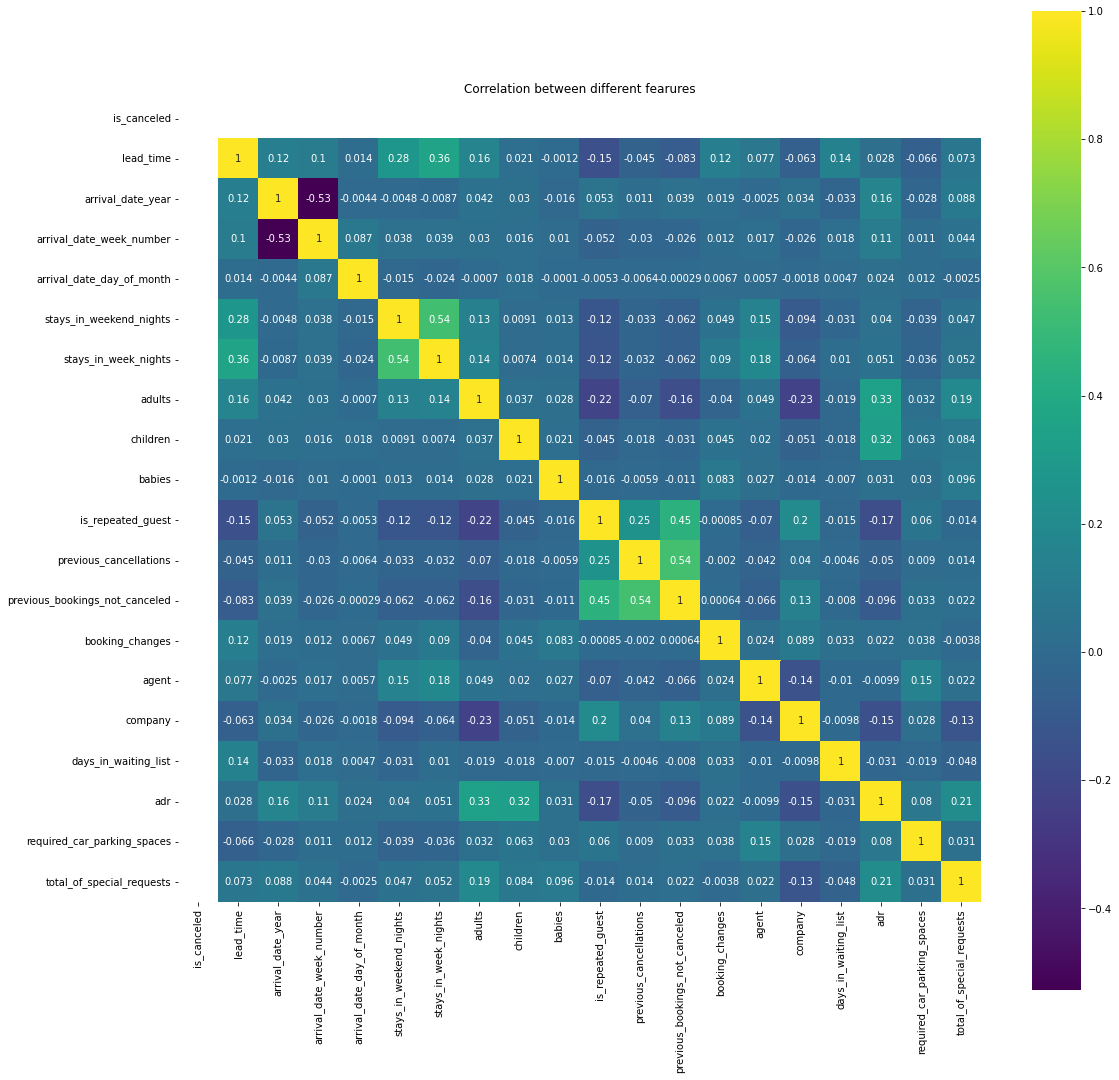

In [481]:
correlation = bookedhotel_data.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [482]:
def transform(dataframe):      
      
    le = LabelEncoder()
    ## Select all categorcial features
    categorical_features = list(dataframe.columns[dataframe.dtypes == object])    
    ## Apply Label Encoding on all categorical features
    return dataframe[categorical_features].apply(lambda x: le.fit_transform(x))

#df = transform(dcopy_new)

In [483]:
X = bookedhotel_data.drop('is_canceled', axis=1)
#Apply tranformation only to categorical columns
Xin=transform(X)
y = bookedhotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(Xin, y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [484]:
pca = PCA().fit(X_train_scaled)

loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
hotel,0.410590,0.309996,0.124898,-0.073068,0.434409,0.152760,-0.009342,-0.573890,-0.414822,0.028882,-0.002346,-0.0
arrival_date_month,0.045876,-0.092760,0.638768,0.216010,-0.337130,-0.003993,0.531798,0.119989,-0.351656,0.009330,0.000336,-0.0
meal,-0.359482,-0.080262,-0.225688,-0.199530,0.422101,0.122920,0.719162,-0.042772,0.247575,0.002982,-0.000451,-0.0
country,0.367086,-0.182133,0.093490,-0.303693,0.494618,-0.433573,-0.040683,0.487897,-0.242100,0.013442,0.001637,-0.0
market_segment,-0.810457,0.446670,0.120026,0.063510,0.120270,-0.160146,-0.090962,0.030857,-0.112670,0.012256,-0.251087,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
assigned_room_type,0.469385,0.774153,-0.044483,0.065655,-0.036760,-0.100399,0.140767,0.091219,0.125136,-0.344540,-0.012731,-0.0
deposit_type,0.075424,-0.074704,0.037123,0.765658,0.446720,0.354193,-0.088479,0.258352,0.039167,-0.001046,0.004449,-0.0
customer_type,0.110672,-0.248238,-0.343032,0.503562,-0.017275,-0.668987,0.154370,-0.287542,-0.008301,0.020775,-0.007178,-0.0
reservation_status,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.0


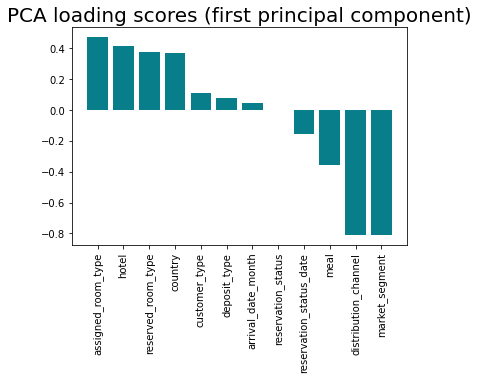

In [485]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

From the PCA, categorical features the columns meal,distribution_channel and market segment are less important when compared to other


# **Q4. Develop a model to predict bookings cancellation and explain the model as well as it’s output.**

In [486]:
#Identify columns not needed for analysis
useless_col = ['hotel', 'days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

data_modelling = dcopy_new1.drop(useless_col, axis = 1)
# convert the 'Date' column to datetime format
data_modelling['reservation_status_date']= pd.to_datetime(data_modelling['reservation_status_date'])
data_modelling['year'] =data_modelling['reservation_status_date'].dt.strftime('%Y')
data_modelling['month'] = data_modelling['reservation_status_date'].dt.strftime('%m')
data_modelling['day'] = data_modelling['reservation_status_date'].dt.strftime('%d')

data_modelling= data_modelling.drop(['reservation_status_date','arrival_date_month'] , axis = 1)

In [487]:
le=LabelEncoder()
a1= data_modelling.select_dtypes(object).columns
cat_list = []
for i in a1:
    print (i, data_modelling[i].nunique())
    cat_list.append(i)
    
for i in cat_list:
    data_modelling[i] = le.fit_transform(data_modelling[i])
data_modelling['year'] = le.fit_transform(data_modelling['year'])
data_modelling['month'] = le.fit_transform(data_modelling['month'])
data_modelling['day'] = le.fit_transform(data_modelling['day'])

meal 5
market_segment 8
distribution_channel 5
reserved_room_type 9
deposit_type 3
customer_type 4
year 4
month 12
day 31


In [488]:
y = data_modelling['is_canceled']
X1 = data_modelling.drop('is_canceled', axis = 1)
X2 = pd.get_dummies(data_modelling)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y,random_state=42,test_size=0.43)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y,random_state=42,test_size=0.43)

In [489]:
scaler = StandardScaler()

X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [490]:
algorithms = ['Random Forest', 'Decision Tree', 'Support Vector Machine']
metrics    = ['Confusion Matrix', 'Classification Report','Accuracy']
train_scores = {}
pd.set_option('display.max_rows', 10)

In [491]:
def algorithm_validation(Algorithm=algorithms, Metrics=metrics):        
    if Algorithm == 'Random Forest':
        model = RandomForestClassifier(max_depth=2, random_state=0)
        model.fit(X_train2, y_train1) 
        y_pred = model.predict(X_test2)
        X_test1['Predict'] = model.predict(X_test2)
        
    elif Algorithm == 'Decision Tree':
        model = DecisionTreeClassifier(random_state=0)
        model.fit(X_train2, y_train1) 
        y_pred = model.predict(X_test2)
        X_test1['Predict'] = model.predict(X_test2)
    
    elif Algorithm == 'Support Vector Machine':
        model = SVC(kernel='linear')
        model.fit(X_train2, y_train1) 
        y_pred = model.predict(X_test2)
        X_test1['Predict'] = model.predict(X_test2)
        
    if Metrics == 'Classification Report':
        score = classification_report(y_test2, y_pred)
        
    elif Metrics == 'Accuracy':
        score = accuracy_score(y_test2, y_pred)
        
    elif Metrics == 'Confusion Matrix':
        plot_confusion_matrix(model, X_test2, y_test2)
        score = confusion_matrix(y_test2, y_pred)
        
    return print('\nThe ' + Metrics + ' of ' + Algorithm + ' is:\n\n'+ str(score) + '\n')

In [492]:
algorithms = ['Random Forest', 'Decision Tree', 'Support Vector Machine']
metrics    = ['Confusion Matrix', 'Classification Report','Accuracy']
algorithm_validation('Random Forest','Classification Report')


The Classification Report of Random Forest is:

              precision    recall  f1-score   support

           0       0.84      1.00      0.92     27290
           1       1.00      0.51      0.67     10219

    accuracy                           0.87     37509
   macro avg       0.92      0.75      0.79     37509
weighted avg       0.89      0.87      0.85     37509




In [493]:
algorithm_validation('Decision Tree','Classification Report')


The Classification Report of Decision Tree is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27290
           1       1.00      1.00      1.00     10219

    accuracy                           1.00     37509
   macro avg       1.00      1.00      1.00     37509
weighted avg       1.00      1.00      1.00     37509




In [494]:
algorithm_validation('Support Vector Machine','Classification Report')


The Classification Report of Support Vector Machine is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27290
           1       1.00      1.00      1.00     10219

    accuracy                           1.00     37509
   macro avg       1.00      1.00      1.00     37509
weighted avg       1.00      1.00      1.00     37509




Classification Report, Accuracy, & Confusion Matrix of Random Forest (RF) explains that the prediction model is able to predict unseen data with 88% accuracy, while both Decision Tree (DT) and Support Vector Machine (SVM) have accuracies of 100%. This means that**Random Forest  model is the best model as it can generalise data prediction for booking cancellation**very well while DT & SVM are overfitted model that could not predict booking cancellation very well when it sees unseen data. Therefore, Random Forest model is the most suitable for deployment on predicting new datasets.

# **Q5. Develop a model to predict the number of booking nights for any new booking.**

In [495]:
dcopy_new1['booking_nights'] = dcopy_new1['stays_in_weekend_nights'] + dcopy_new1['stays_in_week_nights']
useless_col = ['hotel', 'days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

data_regression = dcopy_new1.drop(useless_col, axis = 1)

le=LabelEncoder()
# convert the 'Date' column to datetime format
data_regression['reservation_status_date']= pd.to_datetime(data_regression['reservation_status_date'])
data_regression['year'] =data_regression['reservation_status_date'].dt.strftime('%Y')
data_regression['month'] = data_regression['reservation_status_date'].dt.strftime('%m')
data_regression['day'] = data_regression['reservation_status_date'].dt.strftime('%d')

data_regression = data_regression.drop(['reservation_status_date','arrival_date_month'] , axis = 1)

a = data_regression.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, data_regression[i].nunique())
    cat_list.append(i)
    
for i in cat_list:
    data_regression[i] = le.fit_transform(data_regression[i])
    
data_regression['year'] = le.fit_transform(data_regression['year'])
data_regression['month'] = le.fit_transform(data_regression['month'])
data_regression['day'] = le.fit_transform(data_regression['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



meal 5
market_segment 8
distribution_channel 5
reserved_room_type 9
deposit_type 3
customer_type 4
year 4
month 12
day 31


In [496]:
ry= data_regression['booking_nights']
rX1 = data_regression.drop('booking_nights', axis = 1)
rX2 = pd.get_dummies(data_regression)
rX_train1, rX_test1, ry_train1, ry_test1 = train_test_split(rX1,ry,random_state=42,test_size=0.43)
rX_train2, rX_test2, ry_train2, ry_test2 = train_test_split(rX2,ry,random_state=42,test_size=0.43)

In [497]:
scaler = StandardScaler()

rX_train2 = scaler.fit_transform(rX_train2)
rX_test2 = scaler.transform(rX_test2)

In [498]:
algorithms = ['Linear Regression']
metrics    = ['Root Mean Squared Error', 'R2 Score', 'Mean Squared Error']
train_scores = {}

In [499]:
def algorithm_validation_1(Algorithm=algorithms, Metrics=metrics):
    if  Algorithm == 'Linear Regression':
        from sklearn.linear_model import LinearRegression
        lr = LinearRegression()
        lr.fit(rX_train2, ry_train2) 
        ry_pred = lr.predict(rX_test2)
        rX_test1['Predict'] = lr.predict(rX_test2)
        
    if Metrics == 'Mean Squared Error':
        from sklearn.metrics import mean_squared_error
        score = mean_squared_error(ry_test2, ry_pred)
        train_scores[Algorithm] = mean_squared_error(ry_test2, ry_pred)
        
    elif Metrics == 'Mean Absolute Error':
        from sklearn.metrics import mean_absolute_error
        score = mean_absolute_error(ry_test2, ry_pred)
        train_scores[Algorithm] = mean_absolute_error(ry_test2, ry_pred)
        
    elif Metrics == 'Root Mean Squared Error':
        from sklearn.metrics import mean_squared_error
        score = mean_squared_error(ry_test2, ry_pred)**(1/2)
        train_scores[Algorithm] = mean_squared_error(ry_test2,ry_pred)**(1/2)
        
    elif Metrics == 'R2 Score':
        from sklearn.metrics import r2_score
        score = r2_score(ry_test2, ry_pred)    
        train_scores[Algorithm] = r2_score(ry_test2, ry_pred)
        
    print('\nThe ' + Metrics + ' for ' + Algorithm + ' is : ' + str(round(score,2)) + '\n')
  

In [500]:
algorithms = ['Linear Regression','Support Vector Regression']
metrics    = ['Root Mean Squared Error', 'R2 Score', 'Mean Squared Error']
algorithm_validation_1('Linear Regression','Mean Squared Error')


The Mean Squared Error for Linear Regression is : 0.0



In [501]:
algorithm_validation_1('Linear Regression','R2 Score')


The R2 Score for Linear Regression is : 1.0



Based on all model evaluation metrics (RMSE, MSE, MAE, R2 Score, and MAPE), it is found out that **Linear Regression performed very well with very low error and very high R2 score**. Hence, this model can be used during model deployment in predicting number of booking night when there is a new dataset comes.